# Regularization:
Overfitting impacts the accuracy of Machine Learning models. The model attempts to capture the data points that do not represent the accurate properties of data. These data points may be considered as noise. To avoid the occurrence of overfitting, we may use a method called regularization.

Regularization is a technique that adds information to a model to prevent the occurrence of overfitting. It is a type of regression that minimizes the coefficient estimates to zero to reduce the capacity (size) of a model. In this context, the reduction of the capacity of a model involves the removal of extra weights.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv('../input/real-estate-price-prediction/Real estate.csv')

# Data Overview:
dataset that i worked on, is about house prices based on these 6 parameters:
* 1-transaction date
* 2-house age
* 3-distance to the nearest MRT station
* 4-number of convenience stores
* 5-latitude
* 6-longitude

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

# Exploratory Data Analysis:
as you can see, this below chart shows us the distribution of 'house price of unit area'. based on this chart, mean of 'house price of unit area' is about 40. the maximum of price is about 120.

In [ ]:
sns.displot(df['Y house price of unit area'], kde=True, aspect=2, color='purple')
plt.show()

## correlation: 
to check the correlation of parameters and house price, i displayed the 6 scatter plots to see is there any correlation or not.
* chart 1: we cannot see the impressive correlation between transaction date and house price
* chart 2:there is small negative correlation between house age and house price
* chart 3: as you can see there is a negative corrolation between distance to the nearest MRT station and house price. this means if the 'distance to the nearest MRT station' become more, the house price become less.
* chart 4: there is a positive correlation. it means for more number of convenience stores, the house price become more.
* chart 5 and 6: for these charts, there is a positive correlation.

In [ ]:
fig, axes= plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(1, df.shape[1]-1):
    axes[(i-1)//2, (i+1)%2].set_title(f'chart {i}').set_size(20)
    sns.scatterplot(data=df, x=df.iloc[:, i], y='Y house price of unit area', ax=axes[(i-1)//2, (i+1)%2])

to better understand  the correlations you, can see the last row of this chart. as mentioned, 'house age' and 'distance to the nearest MRT station' have negative correlation with house price. but the 'number of convenience store' and 'geographical location' have positive correlation with house price.

__Note__: Green is shown for positive correlation and white for negative correlation.

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='Greens')
plt.show()

# Determine the Features & Target Variable (Lable)

In [ ]:
X = df.drop(['Y house price of unit area', 'No'],axis=1)
y = df['Y house price of unit area']

 # Preprocessing (Polynomial Conversion)
 
__Note:__ the best degree for model is 2 and for higher degrees, model will be overfit. but we get degree equals 3 and then with regularization, we will handle the overfitting.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter= PolynomialFeatures(degree=3, include_bias=False)
poly_features= polynomial_converter.fit_transform(X)

In [ ]:
poly_features.shape

# Split the Data to Train & Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

# Ridge Regression:
Ridge regression refers to a type of linear regression where in order to get better predictions in the long term, we introduce a small amount of bias. It is also known as L2 regularization. In ridge regression, we have the same loss function with a slight alteration in the penalty term, as shown below:

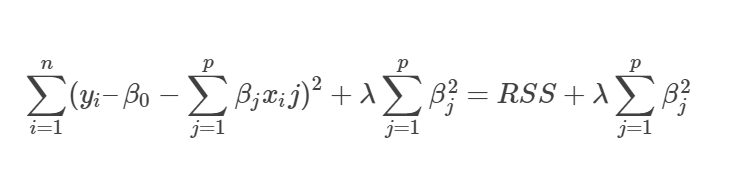

As we can see, the main difference between the above equation and the general equation for the loss function is that <span style="font-size:larger;">$\sum_{j=1}^{p} \beta_{j}^2$</span> contains the squared value of the regression coefficients. The tuning parameter is λ. Higher values of the coefficients represent a model with greater flexibility. To penalize the flexibility of our model, we use a tuning parameter that decides the extent of the penalty. To minimize the function, these coefficients should be small. L2 regularization ensures the coefficients do not rise too high.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model= Ridge(alpha=10)

In [ ]:
ridge_model.fit(X_train, y_train)

In [ ]:
#predict Test Data
y_pred= ridge_model.predict(X_test)

In [ ]:
#Evaluating the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE= mean_absolute_error(y_test, y_pred)
MSE= mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [ ]:
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

# Ridge Regression (Coosing an alpha value with Cross-Validation):

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv_model=RidgeCV(alphas=(0.1, 1, 10), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)
ridge_cv_model.alpha_

In [ ]:
#Predicting Test Data
y_pred_ridge= ridge_cv_model.predict(X_test)

In [ ]:
MAE_ridge= mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge= mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge= np.sqrt(MSE_ridge)

In [ ]:
pd.DataFrame([MAE_ridge, MSE_ridge, RMSE_ridge], index=['MAE', 'MSE', 'RMSE'], columns=['Ridge Metrics'])

#  Lasso Regression:
Lasso regression is a regularization technique used to reduce model complexity. It is also known as L1 regularization. Lasso stands for Least Absolute Shrinkage and Selector Operator.

Let’s look at the equation below:

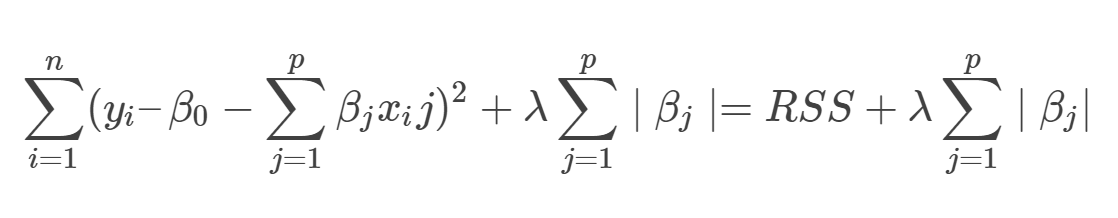
We note that it has a slight variation to the previously discussed loss function, with the introduction of a penalty term. To penalize highly fluctuating coefficients, lasso uses absolute values of the regression coefficients (∣β∣).

Lasso minimizes the regression coefficients to regularize the model parameters. Sometimes, Lasso can reduce regression coefficients to zero, which is particularly important when it comes to feature selection.

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model= LassoCV(eps=0.01, n_alphas=100, cv=5)

In [ ]:
lasso_cv_model.fit(X_train, y_train)

In [ ]:
lasso_cv_model.alpha_

In [ ]:
y_pred_lasso= lasso_cv_model.predict(X_test)

In [ ]:
MAE_Lasso= mean_absolute_error(y_test, y_pred_lasso)
MSE_Lasso= mean_squared_error(y_test, y_pred_lasso)
RMSE_Lasso= np.sqrt(MSE_Lasso)

In [ ]:
pd.DataFrame([MAE_Lasso, MSE_Lasso, RMSE_Lasso], index=['MAE', 'MSE', 'RMSE'], columns=['Lasso Metrics'])

# Elastic Net:
A third commonly used model of regression is the Elastic Net which incorporates penalties from both L1 and L2 regularization:

<img src="https://cdn-images-1.medium.com/max/1024/1*gAmw-_z6v4bG9HcnPSAK3Q.png" alt="drawing" width="500"/>

In addition to setting and choosing a lambda value elastic net also allows us to tune the alpha parameter where 𝞪 = 0 corresponds to ridge and 𝞪 = 1 to lasso. Simply put, if you plug in 0 for alpha, the penalty function reduces to the L1 (ridge) term and if we set alpha to 1 we get the L2 (lasso) term. Therefore we can choose an alpha value between 0 and 1 to optimize the elastic net. Effectively this will shrink some coefficients and set some to 0 for sparse selection.

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=100000)

In [ ]:
elastic_model.fit(X_train, y_train)

In [ ]:
elastic_model.l1_ratio_

In [ ]:
y_pred_elastic=elastic_model.predict(X_test)

In [ ]:
MAE_Elastic= mean_absolute_error(y_test, y_pred_elastic)
MSE_Elastic= mean_squared_error(y_test, y_pred_elastic)
RMSE_Elastic= np.sqrt(MSE_Elastic)

In [ ]:
pd.DataFrame([MAE_Elastic, MSE_Elastic, RMSE_Elastic], index=['MAE', 'MSE', 'RMSE'], columns=['Elastic Metrics'])